# DEEP LEARNING WITH KERAS

In [3]:
#NOTES
#In scikit-learn fit method returned a trained model, however in Keras 
#the fit method returns a History object containing the loss values 
#and performance metrics at each epoch.

#Neural networks often behave poorly when the feature valuesare 
#much larger than parameter values. Thus, standardize features before modelling:
scaler = preprocessing.StandardScaler()
features_standardized = scaler.fit_transform(features)

#USING EARLY STOPPING
#Early stopping will stop the model from training before the number of epochs is reached 
#if the model stops improving after X epochs in a row.
#Example:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)
model.fit(X_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

#MAKING PREDICTIONS
##example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
pred = model.predict(test_X)

#CLASSIFICATION: ONE HOT ENCODING INDEPENDENT VAR
#When separating the target column, we need to call the ‘to_categorical()’ function 
#so that column will be ‘one-hot encoded’.
#Currently, a patient with no diabetes is represented with a 0 in the diabetes column
#and a patient with diabetes is represented with a 1. 
#With one-hot encoding, the integer will be removed and a binary variable is inputted for each category. 
#A patient with no diabetes will be represented by [1 0] and a patient with diabetes will be represented by [0 1].
from keras.utils import to_categorical
train_y_2 = to_categorical(df.target.values)

#SAVE TRAINING MODEL AFTER EACH EPOCH
#After every epoch ModelCheckpoint saves a model to the location specified by the filepath parameter. 
#If we include only a filename (e.g. models.hdf5) that file will be overridden 
#with the latest model every epoch. 
#If we only wanted to save the best model according to the performance of some loss function, 
#we can set save_best_only=True and monitor='val_loss' to not override a file
#if the model has a worse test loss than the previous model. 
#Alternatively, we can save every epoch’s model as its own file by including the epoch number and test loss score 
#into the filename itself. 
#For example if we set filepath to model_{epoch:02d}_{val_loss:.2f}.hdf5, 
#the name of the file containing the model saved after the 11th epoch with a test loss value 
#of 0.33 would be model_10_0.35.hdf5 (notice that the epoch number if 0-indexed).
checkpoint = [ModelCheckpoint(filepath='models.hdf5')]
#The call to this function will be after number of epochs, such as "callbacks=checkpoint"


#SAVING AND LOADING KERAS MODELS
#https://machinelearningmastery.com/save-load-keras-deep-learning-models/
model.save("model.h5") 
#Load model
loaded_model = load_model('model.h5')
#(optional) Summarize model
loaded_model.summary()


#MAKING PREDICTIONS ON NEW DATA
#NEW CLIENT DATA TO BE INSERTED INTO THE MODEL TO MAKE A PREDICTION 
#(((( NOTE: A 0.0 MAY BE NEEDED AT THE BEGINNING OF THE NEW DATA ARRAY ))))
# Geography: France
# Credit Score: 600
# Gender: Male
# Age: 40
# Tenure: 3
# Balance: 60000
# Number of products: 2
# Has Credit Card: Yes
# Is Active Member: Yes
# Estimated Salary: 50000
new_prediction = model.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
#new_prediction = (new_prediction > 0.5 )
new_prediction

#https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37

NameError: name 'preprocessing' is not defined

In [14]:
#BASIC KERAS NN

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense


#load the dataset
dataset = loadtxt(r'D:\Downloads\DATASETS\general\pima_indian_dataset.csv', delimiter=',')

# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]



# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X, y, epochs=10, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
768/768 [==============================] - 2s 2ms/step - loss: 3.6836 - acc: 0.5547
Epoch 2/10
768/768 [==============================] - 0s 224us/step - loss: 2.2039 - acc: 0.5573
Epoch 3/10
768/768 [==============================] - 0s 244us/step - loss: 1.6575 - acc: 0.5807
Epoch 4/10
768/768 [==============================] - 0s 265us/step - loss: 1.3423 - acc: 0.6029
Epoch 5/10
768/768 [==============================] - 0s 326us/step - loss: 1.2341 - acc: 0.6120
Epoch 6/10
768/768 [==============================] - 0s 346us/step - loss: 1.0031 - acc: 0.6211
Epoch 7/10
768/768 [==============================] - 0s 285us/step - loss: 0.8762 - acc: 0.6302
Epoch 8/10
768/768 [==============================] - 0s 265us/step - loss: 0.8098 - acc: 0.6263
Epoch 9/10
768/768 [==============================] - 0s 244us/step - loss: 0.7498 - acc: 0.6224
Epoch 10/10
768/768 [==============================] - 0s 285us/step
Accuracy: 65.89


# Basic Keras Neural Network with train_test_split and dropout

In [17]:
#Basic Keras neural network
#Source: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# load the dataset
dataset = loadtxt(r'D:\Downloads\DATASETS\general\pima_indian_dataset.csv', delimiter=',')

# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

from sklearn.model_selection import train_test_split
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size = 0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size = 0.5)
    
# define the keras model
model = Sequential([
    Dense(32, activation = 'relu', input_shape = (8,)), #input_shape is the size of the vars used as input
    Dropout(0.3), 
    Dense(32, activation = 'relu'), 
    Dropout(0.3),
    Dense(1, activation = 'sigmoid')
])

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# fit the keras model on the dataset
hist = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data = (X_val, y_val))

#Print loss and accuracy
#model.evaluate(X_test, y_test)[0]
model.evaluate(X_test, y_test)[1]

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

## Going deeper into Keras neural networks by graphing loss and accuracy

In [19]:
#Classifying above-market house prices with Keras
#Source: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/josephlee94/intuitive-deep-learning/master/Part%201%3A%20Predicting%20House%20Prices/housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [27]:
#Turning df into array of values
dataset = df.values

#Setting up X and y initial values
X = dataset[:, 0:10]
y = dataset[:,10]

#Scaling the data
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
X_scaled = mmscaler.fit_transform(X)

#Split data into train, test and val set 
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scaled, y, test_size = 0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size = 0.5)

#Building the model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation = 'relu', input_shape = (10,)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')    
])

#Compiling the model
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])#The loss function for outputs that take the values 1 or 0 is "cross entropy"

#Fitting the model
hist = model.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data = (X_val, y_val))

#Printing loss and accuracy (value 0 is loss, value 1 is accuracy)
model.evaluate(X_test, y_test)


Train on 1022 samples, validate on 219 samples
Epoch 1/30
1022/1022 [==============================] - 1s 703us/step - loss: 0.6899 - acc: 0.5078 - val_loss: 0.6877 - val_acc: 0.5297
Epoch 2/30
1022/1022 [==============================] - 0s 107us/step - loss: 0.6867 - acc: 0.5098 - val_loss: 0.6846 - val_acc: 0.5342
Epoch 3/30
1022/1022 [==============================] - 0s 107us/step - loss: 0.6838 - acc: 0.5176 - val_loss: 0.6815 - val_acc: 0.5388
Epoch 4/30
1022/1022 [==============================] - 0s 122us/step - loss: 0.6809 - acc: 0.5411 - val_loss: 0.6785 - val_acc: 0.5525
Epoch 5/30
1022/1022 [==============================] - 0s 138us/step - loss: 0.6780 - acc: 0.5450 - val_loss: 0.6755 - val_acc: 0.5662
Epoch 6/30
1022/1022 [==============================] - 0s 122us/step - loss: 0.6750 - acc: 0.5695 - val_loss: 0.6725 - val_acc: 0.5890
Epoch 7/30
1022/1022 [==============================] - 0s 138us/step - loss: 0.6719 - acc: 0.6272 - val_loss: 0.6691 - val_acc: 0.6393
E

[0.5557563405603034, 0.8447488600804925]

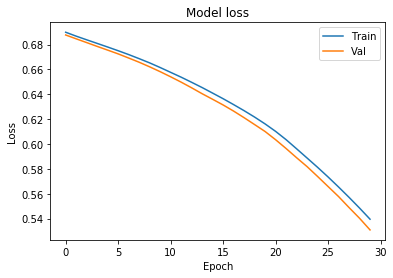

In [28]:
#Visualizing training loss and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

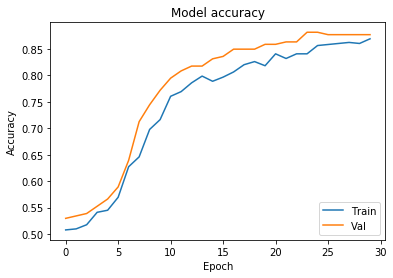

In [29]:
#Visualizing training accuracy and validation accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [30]:
#Since the improvements in our model to the training set looks somewhat matched up
#with improvements to the validation set, 
#it doesn’t seem like overfitting is a huge problem in our model.

# HOW TO AVOID OVERFITTING - Adding Regularization to our Neural Network

In [32]:
#For the sake of introducing regularization to our neural network, 
# let’s formulate with a neural network that will badly overfit on our training set. 
# We’ll call this Model 2.'''

In [34]:

#First we create a model likely to overfit badly
model_2 = Sequential([
    Dense(1000, activation = 'relu', input_shape = (10,)),
    Dense(1000, activation = 'relu'), 
    Dense(1000, activation = 'relu'), 
    Dense(1000, activation = 'relu'), 
    Dense(1, activation = 'sigmoid')
])
model_2.compile(optimizer = 'adam', 
                loss= 'binary_crossentropy', 
                metrics = ['accuracy'])

hist_2 = model_2.fit(X_train, y_train, 
                     batch_size = 32,
                     epochs = 100,
                     validation_data = (X_val, y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 8s 8ms/step - loss: 0.4569 - acc: 0.7730 - val_loss: 0.3957 - val_acc: 0.8265
Epoch 2/100
1022/1022 [==============================] - 6s 6ms/step - loss: 0.3327 - acc: 0.8591 - val_loss: 0.5158 - val_acc: 0.7808
Epoch 3/100
1022/1022 [==============================] - 6s 6ms/step - loss: 0.2978 - acc: 0.8777 - val_loss: 0.3488 - val_acc: 0.8447
Epoch 4/100
1022/1022 [==============================] - 9s 9ms/step - loss: 0.2548 - acc: 0.8777 - val_loss: 0.2979 - val_acc: 0.8721
Epoch 5/100
1022/1022 [==============================] - 7s 7ms/step - loss: 0.2365 - acc: 0.8875 - val_loss: 0.4308 - val_acc: 0.8584
Epoch 6/100
1022/1022 [==============================] - 10s 9ms/step - loss: 0.2644 - acc: 0.8787 - val_loss: 0.2679 - val_acc: 0.8813
Epoch 7/100
1022/1022 [==============================] - 9s 9ms/step - loss: 0.2491 - acc: 0.8924 - val_loss: 0.3039 - val_acc: 0.8767
Epoch 8

Epoch 61/100
1022/1022 [==============================] - 7s 7ms/step - loss: 0.1302 - acc: 0.9413 - val_loss: 0.3630 - val_acc: 0.9087
Epoch 62/100
1022/1022 [==============================] - 7s 6ms/step - loss: 0.1336 - acc: 0.9452 - val_loss: 0.3705 - val_acc: 0.8950
Epoch 63/100
1022/1022 [==============================] - 7s 7ms/step - loss: 0.1298 - acc: 0.9462 - val_loss: 0.3909 - val_acc: 0.8858
Epoch 64/100
1022/1022 [==============================] - 6s 6ms/step - loss: 0.1574 - acc: 0.9354 - val_loss: 0.2852 - val_acc: 0.8858
Epoch 65/100
1022/1022 [==============================] - 6s 6ms/step - loss: 0.1381 - acc: 0.9374 - val_loss: 0.3395 - val_acc: 0.8721
Epoch 66/100
1022/1022 [==============================] - 6s 6ms/step - loss: 0.1437 - acc: 0.9462 - val_loss: 0.3140 - val_acc: 0.8904
Epoch 67/100
1022/1022 [==============================] - 7s 6ms/step - loss: 0.1281 - acc: 0.9413 - val_loss: 0.3733 - val_acc: 0.8858
Epoch 68/100
1022/1022 [========================

In [27]:
#Below we'll see that this NN is clearly overfitting . The training loss is decreasing, but the validation loss is way above the training loss and increasin

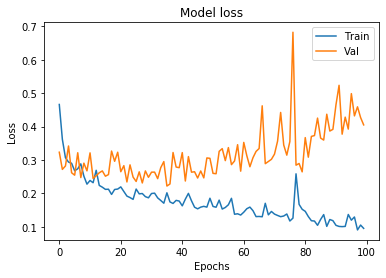

In [29]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

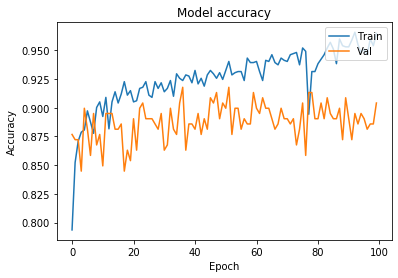

In [30]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

## NOW TO REDUCE OVERFITTING let's add L2 regularization and dropout layers to our model

In [35]:
from keras.models import Sequential
from keras.layers import Dropout
from keras import regularizers

#Note about regularizers:
#1) The number in the kernel_regularizer determines how much we penalize higher parameter values.
#2) in "regularizers.l2" it's a letter 'l' before the '2', NOT the number '1'

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

In [36]:
model_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist_3 = model_3.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data = (X_val, y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 11s 11ms/step - loss: 135.0017 - acc: 0.5196 - val_loss: 32.3586 - val_acc: 0.4658
Epoch 2/100
1022/1022 [==============================] - 8s 8ms/step - loss: 11.0041 - acc: 0.5059 - val_loss: 1.7113 - val_acc: 0.4658
Epoch 3/100
1022/1022 [==============================] - 9s 8ms/step - loss: 0.9497 - acc: 0.5059 - val_loss: 0.7177 - val_acc: 0.4658
Epoch 4/100
1022/1022 [==============================] - 9s 8ms/step - loss: 0.7027 - acc: 0.5059 - val_loss: 0.6949 - val_acc: 0.4658
Epoch 5/100
1022/1022 [==============================] - 11s 11ms/step - loss: 0.6936 - acc: 0.5059 - val_loss: 0.6934 - val_acc: 0.4658
Epoch 6/100
1022/1022 [==============================] - 8s 8ms/step - loss: 0.6931 - acc: 0.5059 - val_loss: 0.6934 - val_acc: 0.4658
Epoch 7/100
1022/1022 [==============================] - 8s 8ms/step - loss: 0.6931 - acc: 0.5059 - val_loss: 0.6935 - val_acc: 0.4658


Epoch 61/100
1022/1022 [==============================] - 8s 8ms/step - loss: 0.6931 - acc: 0.5059 - val_loss: 0.6939 - val_acc: 0.4658
Epoch 62/100
1022/1022 [==============================] - 8s 8ms/step - loss: 0.6931 - acc: 0.5059 - val_loss: 0.6940 - val_acc: 0.4658
Epoch 63/100
1022/1022 [==============================] - 8s 7ms/step - loss: 0.6931 - acc: 0.5059 - val_loss: 0.6941 - val_acc: 0.4658
Epoch 64/100
1022/1022 [==============================] - 8s 8ms/step - loss: 0.6931 - acc: 0.5059 - val_loss: 0.6941 - val_acc: 0.4658
Epoch 65/100
1022/1022 [==============================] - 8s 7ms/step - loss: 0.6931 - acc: 0.5059 - val_loss: 0.6940 - val_acc: 0.4658
Epoch 66/100
1022/1022 [==============================] - 8s 7ms/step - loss: 0.6931 - acc: 0.5059 - val_loss: 0.6940 - val_acc: 0.4658
Epoch 67/100
1022/1022 [==============================] - 8s 7ms/step - loss: 0.6931 - acc: 0.5059 - val_loss: 0.6940 - val_acc: 0.4658
Epoch 68/100
1022/1022 [========================

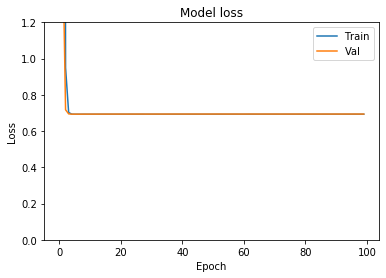

In [37]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.ylim(top = 1.2, bottom = 0)
plt.show()

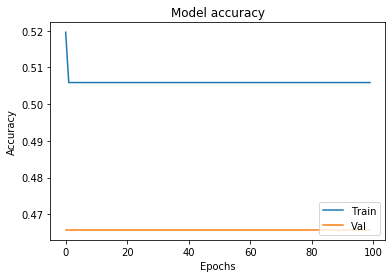

In [38]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'], loc = 'lower right')
plt.show()

### As we can see we have considerably reduced overfitting, using L2 regularization and dropout layers!

## Tuning NN hyperparameters with GridSearchCV

In [45]:
#Tuning NN hyperparameters with GridSearchCV
#Source: https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/

import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

#Set random seed
np.random.seed(0)

#Number of features
number_of_features = 100

#Generate features matrix and target vector
features, target = make_classification(n_samples = 100, 
                                      n_features = number_of_features, 
                                      n_informative = 3, 
                                      n_redundant = 0,
                                      n_classes = 2, 
                                      weights = [.5, .5], 
                                      random_state = 0)

#Create function returning a compiled network

def create_model(optimizer = 'rmsprop'):

    model = Sequential([
    Dense(16, activation = 'relu', input_shape = (number_of_features, )),
    Dense(16, activation = 'relu'), 
    Dense(1, activation = 'sigmoid')
])
    
    model.compile(loss = 'binary_crossentropy', 
                   optimizer = 'rmsprop', 
                   metrics = ['accuracy'])
    return model


#Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn = create_model, verbose = 0)

#Create hypermarameter space
epochs = [2,3]
batches = [5,10,20]
optimizers = ['rmsprop', 'adam']

#Create hyperparameters options
hyperparameters = dict(optimizer = optimizers, epochs = epochs, batch_size = batches)

#Create grid search
grid = GridSearchCV(estimator = neural_network, param_grid = hyperparameters)

#Fit grid search
grid_result = grid.fit(features, target)

#View hyperparameters of best neural network
grid_result.best_params_

D:\Program files\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'batch_size': 5, 'epochs': 3, 'optimizer': 'rmsprop'}

## K-Fold Cross-Validating Neural Networks

In [50]:
#k-Fold Cross-Validating Neural Networks

'''
If we have smaller data it can be useful to benefit from k-fold cross-validation to maximize
our ability to evaluate the neural network’s performance. 
This is possible in Keras because we can “wrap” any neural network 
such that it can use the evaluation features available in scikit-learn, 
including k-fold cross-validation. 
To accomplish this, we first have to create a function that returns a compiled neural network. 
Next we use KerasClassifier (if we have a classifier, if we have a regressor 
we can use KerasRegressor) to wrap the model so it can be used by scikit-learn. 
After this, we can use our neural network like any other scikit-learn learning algorithm 
(e.g. random forests, logistic regression). 
In our solution, we used cross_val_score to run a 3-fold cross-validation on our neural network.
'''

import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

np.random.seed(0)

number_of_features = 100

features, target = make_classification(n_samples = 100, 
                                      n_features = number_of_features, 
                                      n_informative = 3, 
                                      n_redundant = 0,
                                      n_classes = 2,
                                      weights = [.5, .5], 
                                      random_state = 0)

def create_model():
    
    model = Sequential([
    Dense(16, activation = 'relu', input_shape = (number_of_features, )),
    Dense(16, activation = 'relu'), 
    Dense(1, activation = 'sigmoid')
])
    
    model.compile(loss = 'binary_crossentropy', 
                   optimizer = 'rmsprop', 
                   metrics = ['accuracy'])
    return model

neural_network = KerasClassifier(build_fn = create_model, 
                                epochs = 2, 
                                batch_size = 100,
                                verbose = 1)

cross_val_score(neural_network, features, target, cv = 3)

Epoch 1/2
66/66 [==============================] - 9s 133ms/step - loss: 0.7684 - acc: 0.5758
Epoch 2/2
34/34 [==============================] - 3s 100ms/step
Epoch 1/2
67/67 [==============================] - 8s 115ms/step - loss: 0.7743 - acc: 0.4627
Epoch 2/2
33/33 [==============================] - 3s 80ms/step
Epoch 1/2
67/67 [==============================] - 6s 96ms/step - loss: 0.7637 - acc: 0.5224
Epoch 2/2
33/33 [==============================] - 3s 81ms/step
[0.5        0.4848485  0.42424244]
0.4696969787279765


## How to choose number of hidden layers and nodes

In [1]:
#source: https://www.youtube.com/watch?v=Bc2dWI3vnE0&list=PLZoTAELRMXVPkl7oRvzyNnyj1HS4wt2K-&index=54

import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).to_array()
X = X[:, 1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transofrm(X_test)


from keras.wrappers.sickit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim = X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) #Note: no activation beyond this point
    
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
    return model

model = KerasClassifier(build_fnn = create_model, verbose = 0)

layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers = layers, activation = activations, batch_size = [128, 256], epochs = [30])
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid_result = grid.fit(X_train, y_train)

print([grid_result.best_score_, grid_result.best_params_])

pred_y = grid.predict(X_test)
y_pred = (pred_y > 0.5)

print(y_pred)

Using TensorFlow backend.


NameError: name 'labelencoder_X_1' is not defined